# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Evaluación de modelos de regresión

In [5]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Fetch the Boston Housing dataset from OpenML
data = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features and target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MEDV'])
y = y.values.ravel()  # Convert to 1D array

# Ensure X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric data
print(X.dtypes)

# Check for missing values and handle them if necessary
print(X.isnull().sum())
X = X.fillna(X.mean())  # Simple imputation: fill missing values with the mean

# Combine features and target into a single DataFrame (for reference)
data_combined = pd.concat([X, pd.DataFrame(y, columns=['MEDV'])], axis=1)

# Display the first few rows of the combined DataFrame
print(data_combined.head())

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.

## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression

In [7]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")

Dimensiones del conjunto de entrenamiento: (404, 13), (404,)
Dimensiones del conjunto de prueba: (102, 13), (102,)


## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [9]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Entrenamiento R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')

Entrenamiento R^2: 0.75
Test R^2: 0.67


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [11]:
train_mse = mean_absolute_error(y_train, y_train_pred)
test_mse = mean_absolute_error(y_test, y_test_pred)
print(f'Entrenamiento MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

Entrenamiento MSE: 3.31
Test MSE: 3.19


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [12]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Entrenamiento MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

Entrenamiento MAE: 3.31
Test MAE: 3.19


## Evaluación del modelo de clasificación

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
# Convertir a DataFrame
X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])

# Combinar características y objetivo en un solo DataFrame
data_combined = pd.concat([X_c, y_c], axis=1)

# Mostrar las primeras filas del DataFrame combinado
print(data_combined.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


In [14]:
print(data_combined['class'].value_counts())

class
0    50
1    50
2    50
Name: count, dtype: int64


## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [ ]:
#! pip install plotly

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 800x800 with 0 Axes>

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2)

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [17]:
from sklearn.linear_model import LogisticRegression
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=2000,random_state=42)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000, random_state=42)

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

In [19]:
# Calcular la precisión para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calcular la precisión para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)

# Imprimir las puntuaciones de precisión
print(f'Precisión conjunto de entrenamiento: {train_accuracy:.2f}')
print(f'Precisión conjunto de test: {test_accuracy:.2f}')

Precisión conjunto de entrenamiento: 0.97
Precisión conjunto de test: 1.00


## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [20]:
# Calcular la precisión equilibrada para el conjunto de entrenamiento
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

# Calcular la precisión equilibrada para el conjunto de prueba
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Imprimir las puntuaciones de precisión equilibrada
print(f'Precisión equilibrada conjunto de entrenamiento: {train_balanced_accuracy:.2f}')
print(f'Precisión equilibrada conjunto de prueba: {test_balanced_accuracy:.2f}')

Precisión equilibrada conjunto de entrenamiento: 0.97
Precisión equilibrada conjunto de prueba: 1.00


## 10. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Same as 8

## 11. Calcule e imprima la puntuación de recuerdo tanto para el conjunto de entrenamiento como para el de prueba.

In [21]:
from sklearn.metrics import recall_score
# Calcular el recall para el conjunto de entrenamiento
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Calcular el recall para el conjunto de prueba
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Imprimir las puntuaciones de recall
print(f'Recuerdo conjunto de entrenamiento: {train_recall:.2f}')
print(f'Recuerdo conjunto de prueba: {test_recall:.2f}')

Recuerdo conjunto de entrenamiento: 0.97
Recuerdo conjunto de prueba: 1.00


## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [22]:
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calcular la puntuación F1 para el conjunto de prueba
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir las puntuaciones F1
print(f'Puntuación F1 en el conjunto de entrenamiento: {train_f1:.2f}')
print(f'Puntuación F1 en el conjunto de prueba: {test_f1:.2f}')

Puntuación F1 en el conjunto de entrenamiento: 0.97
Puntuación F1 en el conjunto de prueba: 1.00


## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

Matriz de confusión del conjunto de entrenamiento:
 [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
Matriz de confusión del conjunto de prueba:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


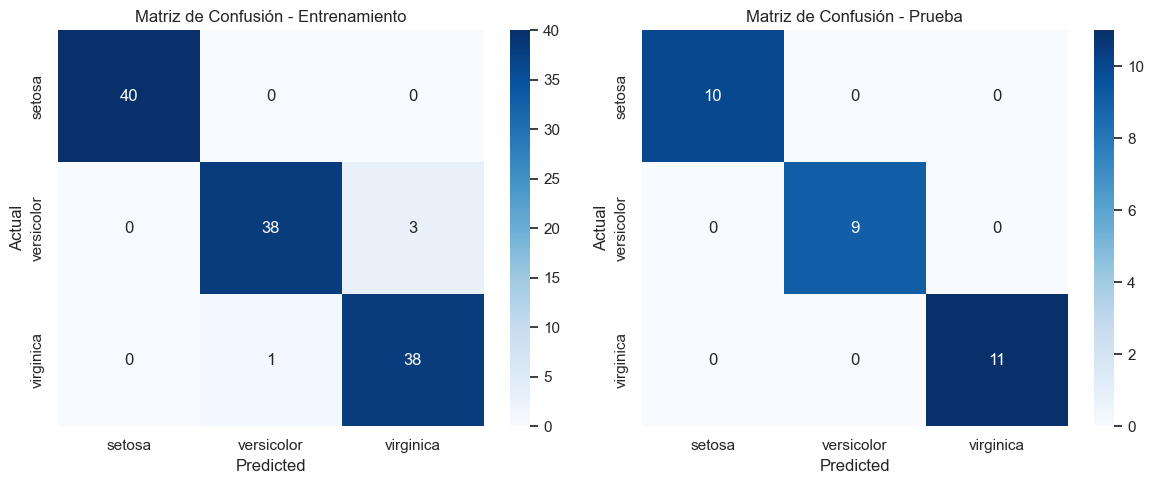

In [23]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Generar la matriz de confusión para el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Imprimir las matrices de confusión
print("Matriz de confusión del conjunto de entrenamiento:\n", train_conf_matrix)
print("Matriz de confusión del conjunto de prueba:\n", test_conf_matrix)

# Visualizar las matrices de confusión usando heatmap de seaborn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data["target_names"], yticklabels=data["target_names"])
plt.title('Matriz de Confusión - Entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data["target_names"], yticklabels=data["target_names"])
plt.title('Matriz de Confusión - Prueba')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

In [ ]:
# Your code here